In [1]:
import requests
import pprint
import os
import zipfile 
import pandas
import pandas as pd
import csv
import matplotlib.pyplot as plt
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
import numpy as np
import nltk
nltk.download()

%matplotlib inline

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [2]:
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip'
r = requests.get(data_url)

In [3]:
sms_zip_file = 'smsspamcollection.zip'
#http = urllib3.PoolManager()
with open(sms_zip_file, 'wb') as out_file:
    out_file.write(r.content)

In [4]:
dir_listing = os.listdir('.')
print(dir_listing)

['Signals and Systems(1).zip', 'Spam.ipynb', 'BayesianDecisionTheory.ppt', 'Bernardo Weekly Timesheet(1).pdf', 'skypeforlinux-64.deb', 'SampleMidtermSol.pdf', 'Smart Sealing Resources.pdf_citation_9-21-2017_195945310.pdf', '21931724_1522217397862790_2045179460_o.jpg', 'lab1_Verilog.pdf', '21931517_1522222601195603_1720540261_o.jpg', 'Bernardo_Aristoteles_indigo_9964419usCOLE-dfe.pdf', '.ipynb_checkpoints', 'FinalReview.ppt', 'BayesianDecisionTheoryCaseStudies.pptx', 'GPT Smart Sealing Progress Reports 10_03_2017.pdf', 'Advisors Letter.docx', 'HW3_sol(1).pdf', 'Weekly Time Sheet 09252017.docx.pdf', 'jdk-9', 'Hyuuga_Downloads_Sword_Art_Online_Movie_Ordinal_Scale_Provisorio.mp4', 'lecture4.pdf', 'exam1SIG.docx', 'BantuMessenger-master(1).zip', 'Projects.zip', 'Spam Filter.ipynb', 'Aristoteles FTP HW.7z', 'jdk-9_linux-x64_bin.tar.gz', 'Template - Team Skills Document.docx', 'Untitled2.ipynb', 'lecture6_final.pdf', 'ch3.pdf', 'Task schedule 10_09_2017.xlsx', 'Signals and Systems.zip', 'Fina

In [5]:
assert sms_zip_file in dir_listing , "directory doesn't contain {}".format(sms_zip_file)
with zipfile.ZipFile(sms_zip_file,"r") as zip_ref:
    zip_ref.extractall("data")

In [6]:
print(os.listdir('./data'))

['SMSSpamCollection', 'readme']


In [7]:
with  open('./data/SMSSpamCollection', 'r') as f:
    sms_messages = f.readlines()

In [8]:
print(sms_messages[0:10])

['ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...\n', 'ham\tOk lar... Joking wif u oni...\n', "spam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\n", 'ham\tU dun say so early hor... U c already then say...\n', "ham\tNah I don't think he goes to usf, he lives around here though\n", "spam\tFreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, \xc2\xa31.50 to rcv\n", 'ham\tEven my brother is not like to speak with me. They treat me like aids patent.\n', "ham\tAs per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune\n", 'spam\tWINNER!! As a valued network customer you have been selected to receivea \xc2\xa3900 prize reward! To clai

In [9]:
sms_messages = [m.rstrip() for m in sms_messages]
print('Number of sms messages is {}'.format(len(sms_messages)))

Number of sms messages is 5574


In [10]:
for idx, msg in enumerate(sms_messages[0:20]):
    print('message id {}  {}'.format(idx, msg))

message id 0  ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
message id 1  ham	Ok lar... Joking wif u oni...
message id 2  spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
message id 3  ham	U dun say so early hor... U c already then say...
message id 4  ham	Nah I don't think he goes to usf, he lives around here though
message id 5  spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv
message id 6  ham	Even my brother is not like to speak with me. They treat me like aids patent.
message id 7  ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
message id 8  spam	WINNER!! As a valued network customer 

In [11]:
messages = pandas.read_csv('./data/SMSSpamCollection', sep='\t', quoting=csv.QUOTE_NONE, names=["label", "message"])
print(messages)

     label                                            message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
5     spam  FreeMsg Hey there darling it's been 3 week's n...
6      ham  Even my brother is not like to speak with me. ...
7      ham  As per your request 'Melle Melle (Oru Minnamin...
8     spam  WINNER!! As a valued network customer you have...
9     spam  Had your mobile 11 months or more? U R entitle...
10     ham  I'm gonna be home soon and i don't want to tal...
11    spam  SIX chances to win CASH! From 100 to 20,000 po...
12    spam  URGENT! You have won a 1 week FREE membership ...
13     ham  I've been searching for the right words to tha...
14     ham                I HAVE A DATE ON SUNDAY WITH WILL!!
15    sp

In [12]:
messages.groupby('label').describe()

messages['length'] = messages['message'].map(lambda text: len(text))

In [13]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


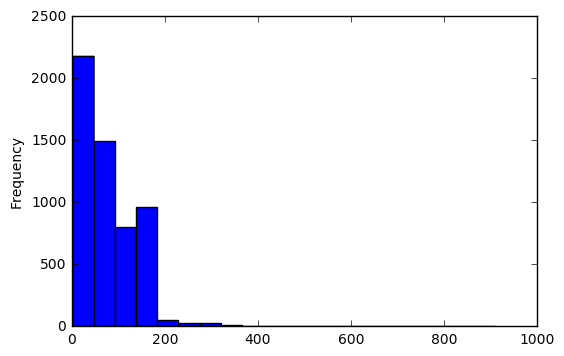

In [14]:
messages.length.plot(bins=20, kind='hist')

In [15]:
messages.length.describe()

count    5574.000000
mean       80.604593
std        59.919970
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [16]:
print('Longest message is {}'.format(list(messages.message[messages.length > 900])))

Longest message is ["For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd2cf06050>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fbd2c8fc210>], dtype=object)

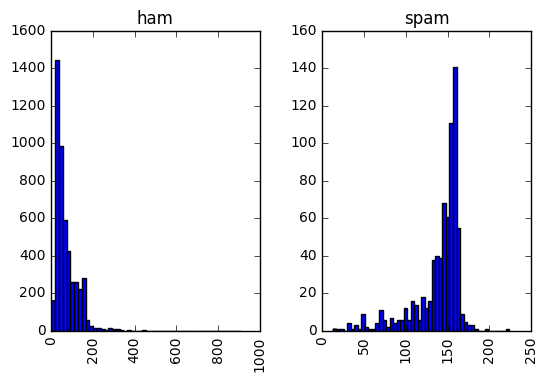

In [17]:
messages.hist(column='length', by='label', bins=50)

In [18]:
messages.label.describe()

count     5574
unique       2
top        ham
freq      4827
Name: label, dtype: object

In [19]:
def split_into_tokens(message):
    message = unicode(message, 'utf8')  # convert bytes into proper unicode
    return TextBlob(message).words 

In [20]:
messages.message.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: message, dtype: object

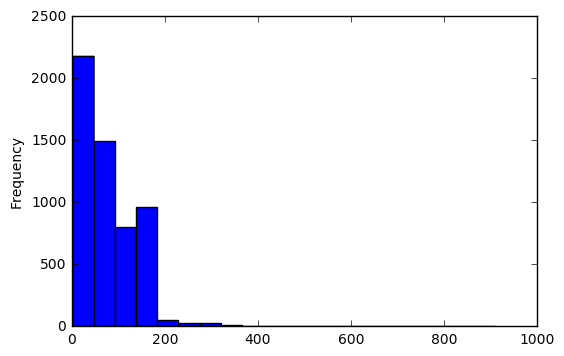

In [23]:
messages.length.plot(bins=20, kind='hist')

In [24]:
messages.length.describe()

count    5574.000000
mean       80.604593
std        59.919970
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [25]:
print('Longest message is {}'.format(list(messages.message[messages.length > 900])))

Longest message is ["For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd2c5f9c50>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fbd2feab0d0>], dtype=object)

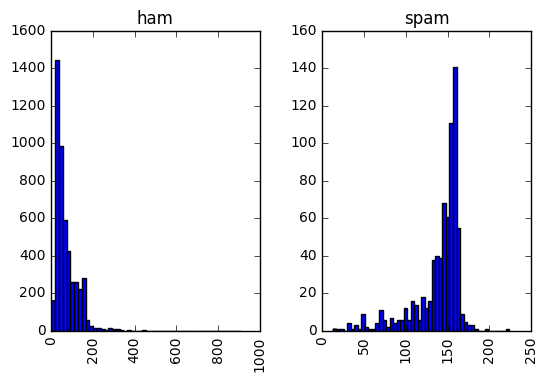

In [26]:
messages.hist(column='length', by='label', bins=50)

In [27]:
messages.groupby('label').length.describe()

label       
ham    count    4827.000000
       mean       71.548374
       std        58.344379
       min         2.000000
       25%        33.000000
       50%        52.000000
       75%        93.000000
       max       910.000000
spam   count     747.000000
       mean      139.124498
       std        28.996658
       min        13.000000
       25%       133.000000
       50%       149.000000
       75%       158.000000
       max       224.000000
Name: length, dtype: float64

In [28]:
def split_into_tokens(message):
    message = unicode(message, 'utf8')  # convert bytes into proper unicode
    return TextBlob(message).words

In [29]:
messages.message.head().apply(split_into_tokens)

0    [Go, until, jurong, point, crazy, Available, o...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, in, 2, a, wkly, comp, to, win, F...
3    [U, dun, say, so, early, hor, U, c, already, t...
4    [Nah, I, do, n't, think, he, goes, to, usf, he...
Name: message, dtype: object

In [30]:
def split_into_lemmas(message):
    message = unicode(message, 'utf8').lower()
    words = TextBlob(message).words
    # for each word, take its "base form" = lemma 
    return [word.lemma for word in words]

# see how head portion changes
messages.message.head().apply(split_into_lemmas)

0    [go, until, jurong, point, crazy, available, o...
1                       [ok, lar, joking, wif, u, oni]
2    [free, entry, in, 2, a, wkly, comp, to, win, f...
3    [u, dun, say, so, early, hor, u, c, already, t...
4    [nah, i, do, n't, think, he, go, to, usf, he, ...
Name: message, dtype: object

In [31]:
bow_transformer = CountVectorizer(analyzer=split_into_lemmas).fit(messages['message'])
print('Number of unique words in our dictionary are {}'.format(len(bow_transformer.vocabulary_)))

Number of unique words in our dictionary are 8859


In [32]:
message4 = messages['message'][3]
print(message4)

U dun say so early hor... U c already then say...


In [33]:
bow4 = bow_transformer.transform([message4])
print(bow4)
print(bow4.shape)

  (0, 1158)	1
  (0, 1897)	1
  (0, 2893)	1
  (0, 2923)	1
  (0, 4017)	1
  (0, 6726)	2
  (0, 7101)	1
  (0, 7687)	1
  (0, 8002)	2
(1, 8859)


In [34]:
print(message4)
print(bow_transformer.get_feature_names()[6726])
print (bow_transformer.get_feature_names()[8002])

U dun say so early hor... U c already then say...
say
u


In [35]:
messages_bow = bow_transformer.transform(messages['message'])
print 'sparse matrix shape:', messages_bow.shape
print 'number of non-zeros:', messages_bow.nnz
print 'sparsity: %.2f%%' % (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))

sparse matrix shape: (5574, 8859)
number of non-zeros: 80338
sparsity: 0.16%


In [36]:
def estimate_class_probability_of_words(messages_bow, messages_label, class_label):
    bowArray = messages_bow.toarray()
    bowDataFrame = pd.DataFrame(bowArray)
    bowDataFrame['label'] = pd.Series(messages.label)
    
    hamDataFrame = bowDataFrame.loc[ bowDataFrame.label == 'ham']
    del hamDataFrame['label']
    
    matrixHamDataFrame = np.array(hamDataFrame)
    arrayMatrixHam = matrixHamDataFrame.sum(axis=0)
    
    nHamWords = arrayMatrixHam.sum(axis=0)
    pHam = 1.0*arrayMatrixHam/nHamWords
    
    spamDataFrame = bowDataFrame.loc[bowDataFrame.label =='spam']
    del spamDataFrame['label']
    
    matrixSamDataFrame = np.array(spamDataFrame)
    arrayMatrixSpam = matrixSamDataFrame.sum(axis=0)
    
    nSpamWords = arrayMatrixSpam.sum(axis=0)
    
    pSpam = 1.0*arrayMatrixSpam/nSpamWords
    
    print pHam
    print pSpam
    
    if class_label == 'ham':
        return pHam
    elif class_label == 'spam':
        return pSpam

In [37]:
def estimate_class_prior(num_ham_msg, num_spam_msg):
    total = num_ham_msg + num_spam_msg
    return [num_ham_msg/total, num_spam_msg/total]

In [41]:
estimatedHam = estimate_class_probability_of_words(messages_bow, messages.label, 'ham')
estimatedSpam = estimate_class_probability_of_words(messages_bow, messages.label, 'spam')

[  7.07984651e-05   1.41596930e-05   1.41596930e-05 ...,   1.41596930e-05
   1.41596930e-05   1.41596930e-05]
[ 0.  0.  0. ...,  0.  0.  0.]
[  7.07984651e-05   1.41596930e-05   1.41596930e-05 ...,   1.41596930e-05
   1.41596930e-05   1.41596930e-05]
[ 0.  0.  0. ...,  0.  0.  0.]


In [42]:
bowArray = messages_bow.toarray()
N = len(bowArray[:,1])
D = len(bowArray[1,:])

tHamProb = []
tSpamProb = []

for i in range(0, N):
    mThetaHam = 1
    mThetaSpam = 1
    
    thetaHam = 0
    thetaSpam = 0
    for j in range(0, D):
        thetaHam = estimatedHam[j]**bowArray[i, j]
        thetaSpam = estimatedSpam[j]**bowArray[i, j]
        
        mThetaHam = mThetaHam*thetaHam
        mThetaSpam = mThetaSpam*thetaSpam
    
    tHamProb.append(mThetaHam*4827/(4827+747))
    tSpamProb.append(mThetaSpam*747/(4827+747))
    

In [44]:
prediction = []

for i in range(0, N):
    if tHamProb[i]>tSpamProb[i]:
        prediction.append('ham')
    else:
        prediction.append('spam')

print 'The accuracy is :', accuracy_score(messages['label'], prediction)

print 'Confusion Matrix: \n', confusion_matrix(messages['label'], prediction)

lable = messages.label
lablePrediction = prediction
HS = ['ham','spam']

print'Classification report: \n',classification_report(lable, lablePrediction, target_names= HS)

The accuracy is : 0.997129529961
Confusion Matrix: 
[[4813   14]
 [   2  745]]
Classification report: 
             precision    recall  f1-score   support

        ham       1.00      1.00      1.00      4827
       spam       0.98      1.00      0.99       747

avg / total       1.00      1.00      1.00      5574



In [49]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)
messages_tfidf = tfidf_transformer.transform(messages_bow)
spam_detector = MultinomialNB().fit(messages_tfidf, messages['label'])
predictionsNB = spam_detector.predict(messages_tfidf)

In [54]:
print 'The accuracy using MultinomialNB is :', accuracy_score(messages['label'], predictionsNB)

print 'Confusion Matrix using MultinomialNB is: \n', confusion_matrix(messages['label'], predictionsNB)

lable = messages.label
lablePrediction = predictionsNB

print'Classification report using MultinomialNB is: \n',classification_report(lable, lablePrediction, target_names= HS)

The accuracy is : 0.969501255831
Confusion Matrix: 
[[4827    0]
 [ 170  577]]
Classification report: 
             precision    recall  f1-score   support

        ham       0.97      1.00      0.98      4827
       spam       1.00      0.77      0.87       747

avg / total       0.97      0.97      0.97      5574

